In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Optional for better visuals
sns.set(style="whitegrid")

# Load the dataset 
df = pd.read_csv('../data/togo-dapaong_qc.csv')

# Show the first few rows
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [7]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [8]:
missing = df.isna().sum()
missing_percent = (missing / len(df)) * 100
missing_report = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_percent
})
missing_report[missing_report['Missing %'] > 5]


,Missing Count,Missing %
Comments,525600,100.0


Outlier Detection and Basic Cleaning

In [9]:
from scipy.stats import zscore
import numpy as np

columns_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Z-score calculation
z_scores = df[columns_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3)

# Flagging outliers
df["outlier_flag"] = outliers.any(axis=1)

# Impute or drop
df_cleaned = df.copy()

for col in columns_to_check:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Drop or mark rows if needed
 #df_cleaned = df_cleaned[~df_cleaned["outlier_flag"]]


Export Clean Dataset

In [10]:
df_cleaned.to_csv("../data/togo_clean.csv", index=False)


Time Series Analysis

<Figure size 1200x600 with 0 Axes>

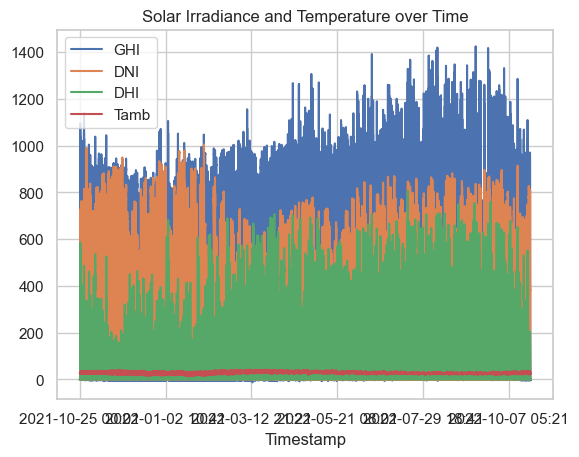

In [11]:
import matplotlib.pyplot as plt

#df["Timestamp"] = pd.to_datetime(df["Timestamp"])  # Adjust if needed

plt.figure(figsize=(12, 6))
df.set_index("Timestamp")[["GHI", "DNI", "DHI", "Tamb"]].plot()
plt.title("Solar Irradiance and Temperature over Time")
plt.show()


Cleaning Impact on ModA & ModB

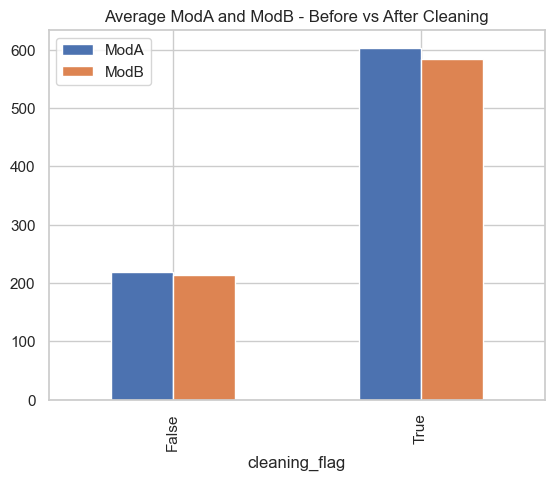

In [12]:
df["cleaning_flag"] = df["outlier_flag"]  # You can also define it differently

df.groupby("cleaning_flag")[["ModA", "ModB"]].mean().plot(kind="bar")
plt.title("Average ModA and ModB - Before vs After Cleaning")
plt.show()



Corrolation Heatmap

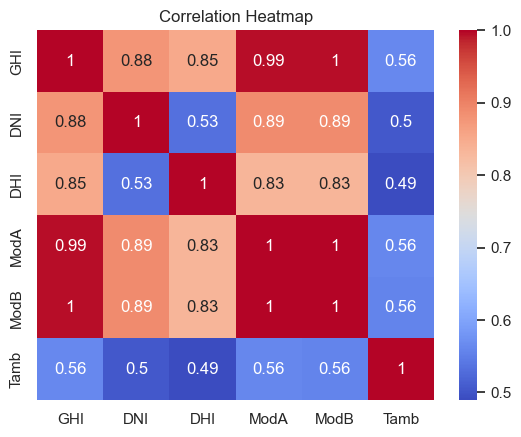

In [13]:
import seaborn as sns

corr_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "Tamb"]
corr = df_cleaned[corr_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Wind & Distribution Analysis Histogram

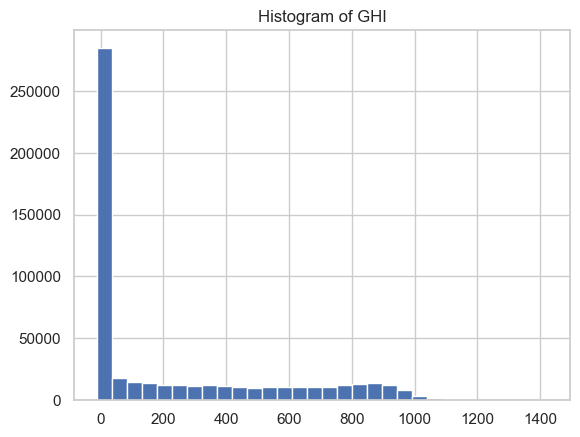

In [15]:
df_cleaned["GHI"].hist(bins=30)
plt.title("Histogram of GHI")
plt.show()


Temperature & Humidity

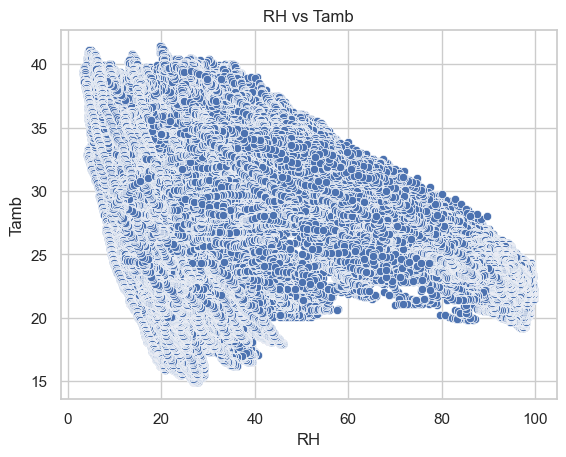

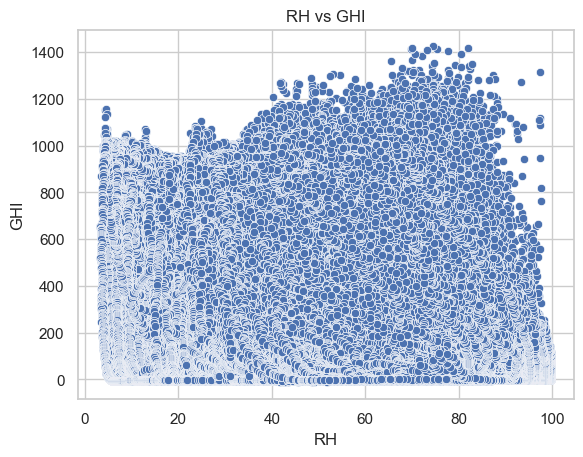

In [16]:
sns.scatterplot(x="RH", y="Tamb", data=df_cleaned)
plt.title("RH vs Tamb")
plt.show()

sns.scatterplot(x="RH", y="GHI", data=df_cleaned)
plt.title("RH vs GHI")
plt.show()


Bubble Chart: GHI vs Tamb with RP/BP

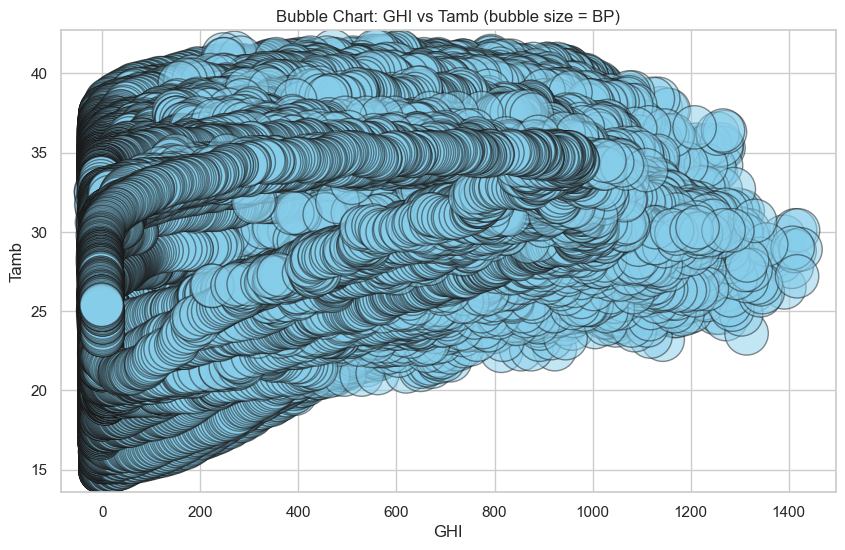

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned["GHI"], df_cleaned["Tamb"], 
            s=df_cleaned["BP"], alpha=0.5, c='skyblue', edgecolors='k')

plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("Bubble Chart: GHI vs Tamb (bubble size = BP)")
plt.grid(True)
plt.show()
